In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path=r"C:\Users\Lavan\Downloads\datafiles\Visadataset.csv"

In [25]:
import pandas as pd
visa_df = pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [26]:
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns
num_column


Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

# box plot

- box plot is used to identify the outliers
- outlier is an observation having huge positive value or huge negative value
- q1=25p q2=50p,q3=75p
- iqr=inter quartile range =q3-q1
- q3+1.5*iqr and q3-1.5*iqr

In [27]:
# read the prevailing wage data and plot the box plot

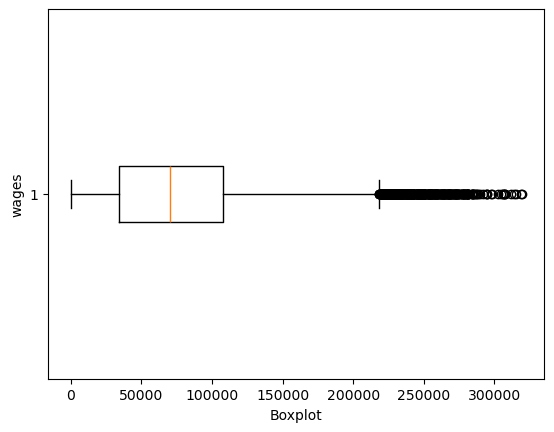

In [28]:
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.ylabel('wages')
plt.show()

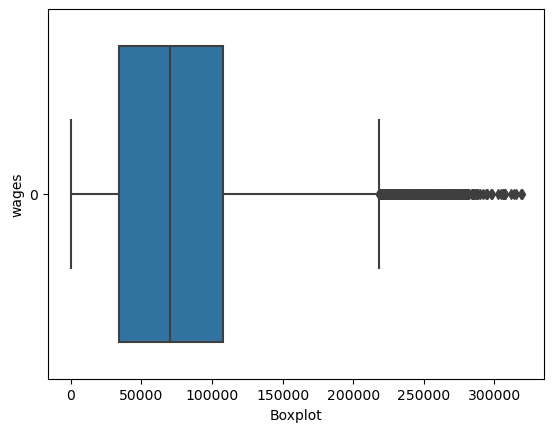

In [29]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.xlabel('Boxplot')
plt.ylabel('wages')
plt.show()

<Axes: ylabel='count'>

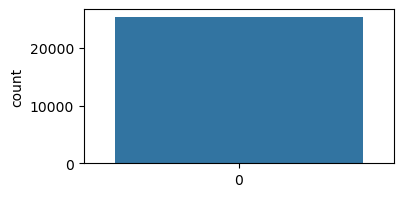

In [30]:
import seaborn as sns
plt.figure(figsize=(4,2)) # x- axis is 8 units,5 units y-axis
wage_data=visa_df['prevailing_wage']
sns.countplot(data=wage_data)


In [31]:
import matplotlib.pyplot as plt
plt.bar('continent', # Cat column  X-axis
        'Number of Applicants',data=continents_df) #

NameError: name 'continents_df' is not defined

In [32]:
# plot the histogram plot and box plot side by side

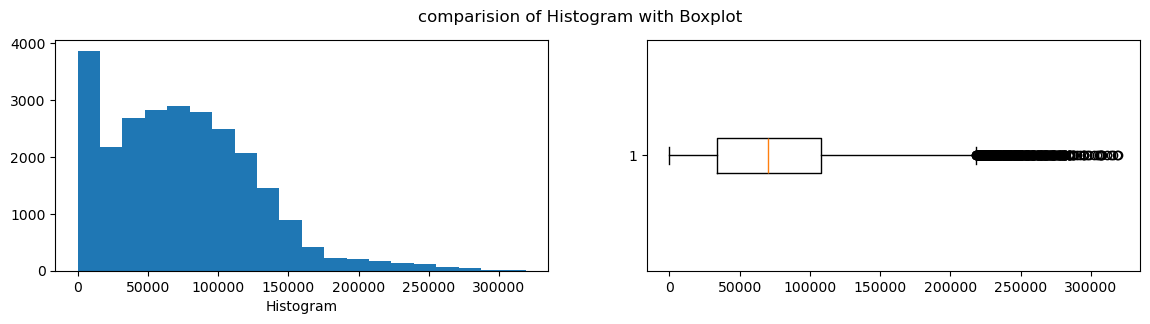

In [33]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle('comparision of Histogram with Boxplot')
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')

plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.show()

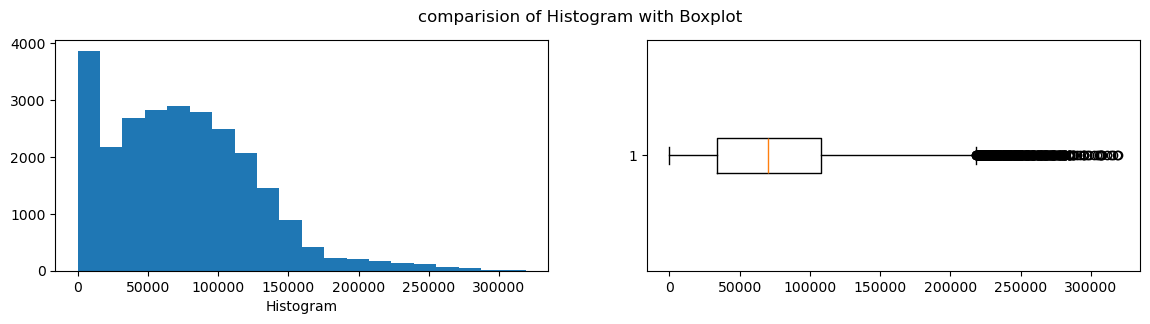

In [34]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))

plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')

plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.show()

In [36]:
# finding the outliers

- we already know that outliers avaliable less than 
step1: calculate q1=25p
                  q2 = 50p
                  q3=75p

step2: 
   calculate iqr =q3-q1
 
step-3
      - calculata lb = q1-1.5*iqr
      - calculate ub = q3+1.5*iqr
step4:
      - con1= wage data<lb
     - con2 = wage data>ub
      con3 = con1 or con2

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [37]:
wage_data=visa_df['prevailing_wage']
q1 = np.percentile(wage_data,25)
q2=  np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR= q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [38]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [39]:
wage_data=visa_df['prevailing_wage']
q1 = np.percentile(wage_data,25)
q2=  np.percentile(wage_data,50)
q3 = np.percentile(wage_data,75)
IQR= q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data>lb
con2=wage_data<ub
con3=con1 & con2
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframe
- visa_df:total data 25480
- non_outliers_df = after removing outliers 25053

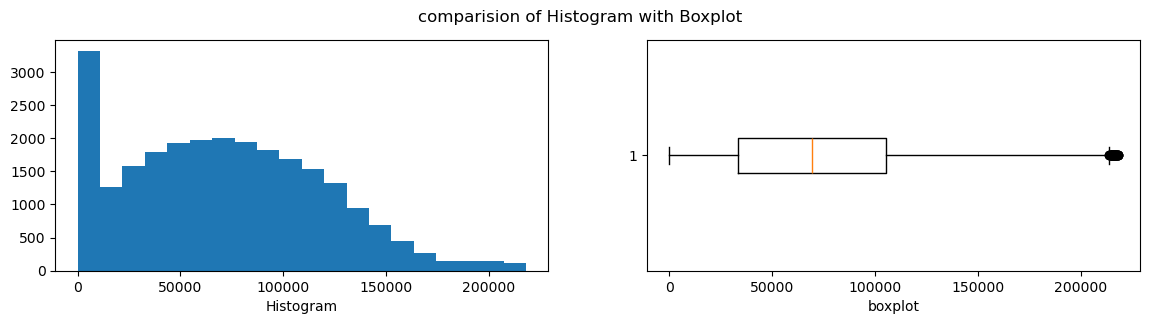

In [40]:

wage_data_non_outliers_df=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))

plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers_df,bins=20)
plt.xlabel('Histogram')

plt.subplot(1,2,2).boxplot(wage_data_non_outliers_df,vert=False)
plt.xlabel('boxplot')
plt.show()

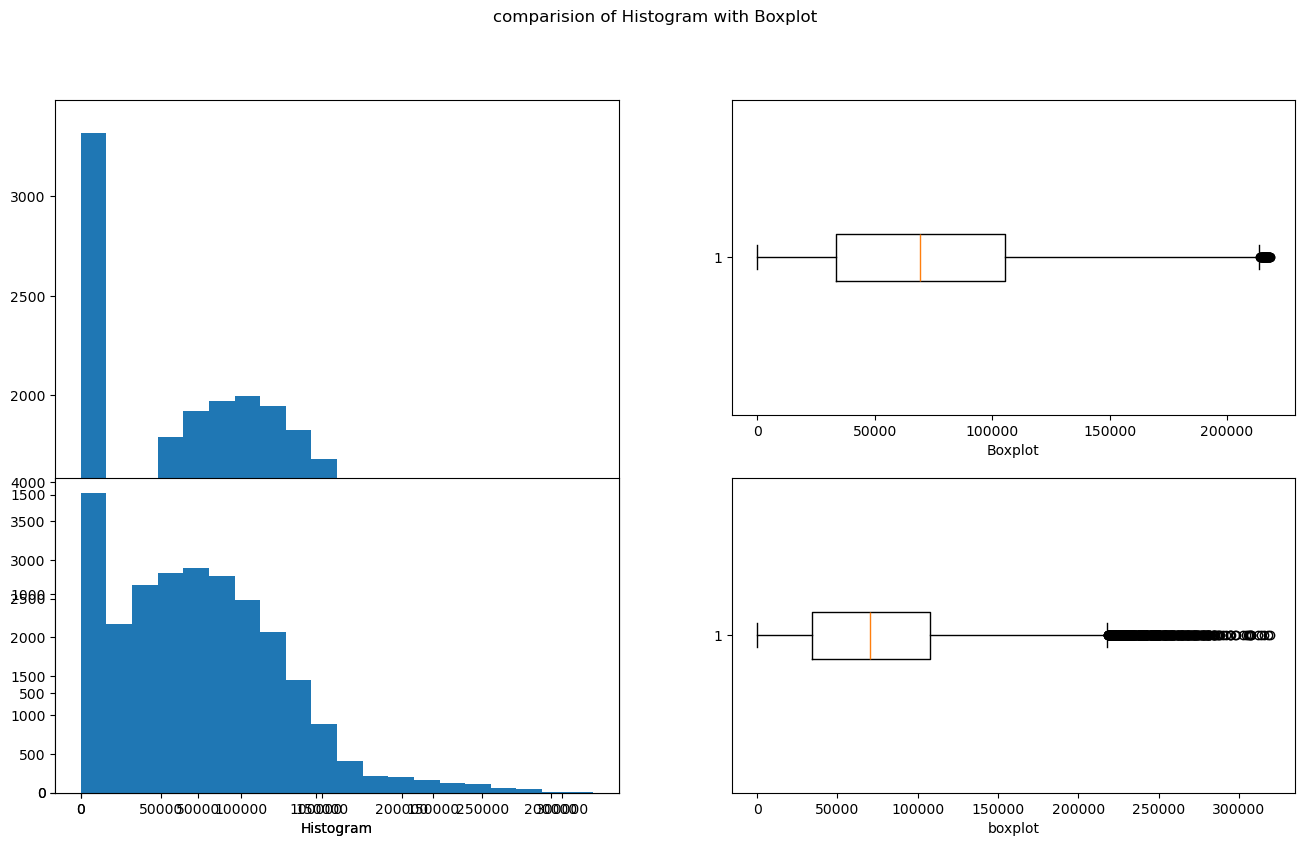

In [41]:
wage_data_non_outliers_df=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(16,9))

plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers_df,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers_df,vert=False)
plt.xlabel('Boxplot')
##### entire data
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

In [42]:
# fill the outliers of wage data with wage median
# 427 outliers
# 427 should replace with median value 
# again draw the plots


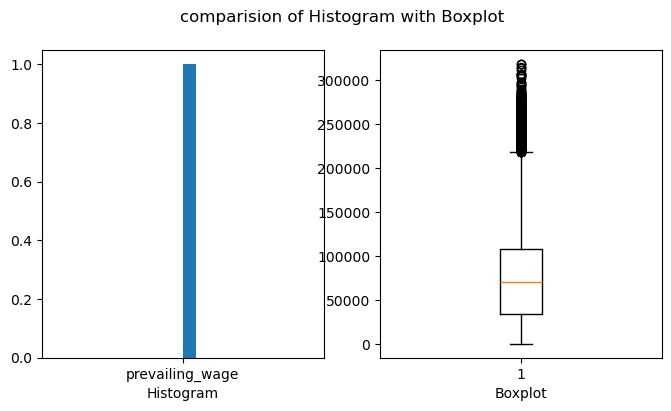

In [43]:
median_wage=visa_df['prevailing_wage'].median()
outliers_df = visa_df.head(427)
wage_data =outliers_df.replace(427,'median')
plt.figure(figsize=(8,4))
plt.suptitle('comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist('prevailing_wage',bins=20)
plt.xlabel('Histogram')
############################
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.xlabel('Boxplot')
plt.show()

In [44]:
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns
num_column


Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

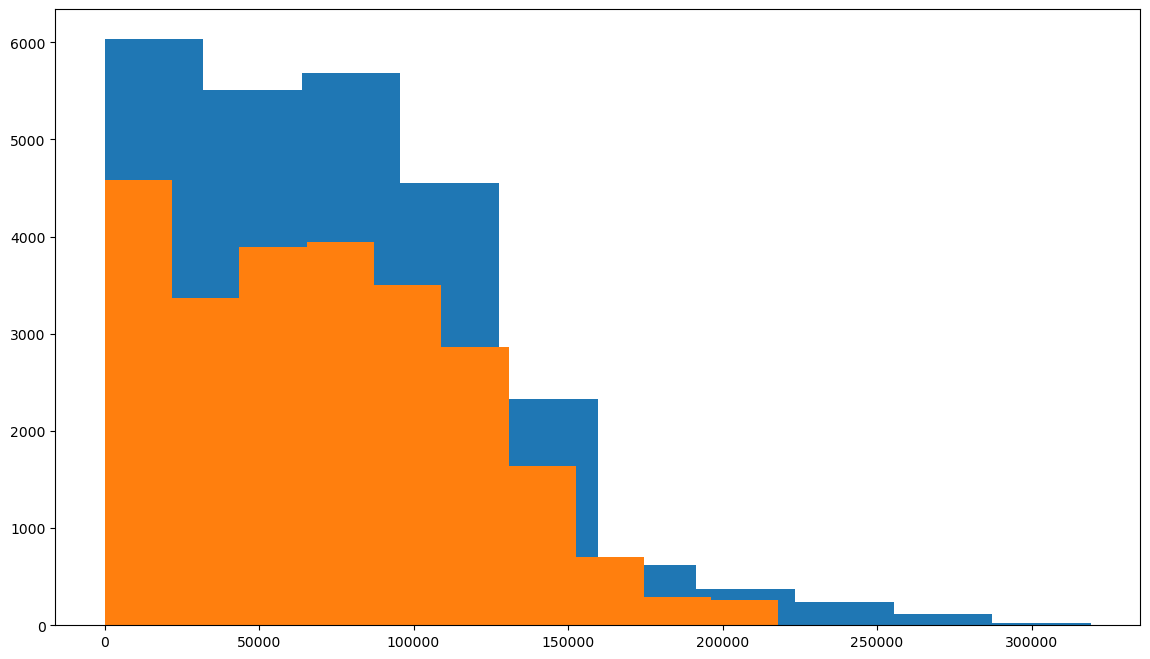

In [45]:
wage_data_non_outliers_df=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers_df)
plt.show()

# how to deal the outfilers

In [47]:
- 1. we can drop the outliers
     - droping outliers is an easy task ,but not recomended
    - if you drop the outliers we are dropping the rows
    - which means we are dropping the other column values also
    - may be some important information we might loose from other column values
    - but in industry if outliers percentage less than 2% of the total data ,we can drop
    - the number of outliers in pwage is 427
    - the number of total observations are 25480
    - the percentage is 1.67 which is lessthan 2%
2. fill with median value
        - we already know that outliers does not affected by median
        - so it is the best practice to fill the outliers with median
3. capping or florring
   - instead of fill with median
   - we can fill with certain values
   - the outliers which are less than lb fill with lb value
   - the outliers which are greaterthan ub fill with ub value

# isolation forest
- is ml model used to find the outliers and anamolies 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

# fill with median value

In [48]:
# np.where 
- in numpy we have called where 
- it takes three arguments
   1.condition
   2. value if condition is true
   3. value if condition is False
- it is applicable for only binary means if and else

SyntaxError: invalid decimal literal (3493269487.py, line 4)

In [49]:
for value in wage_data:
    print(value)

592.2029
83425.65
122996.86
83434.03
149907.39
78252.14
53635.39
418.2298
74362.19
67514.76
83588.56
70813.09
28663.05
107196.03
220081.73
74108.02
3706.79
16132.61
150441.13
79948.12
71128.98
137694.98
45642.39
90108.38
71286.04
99489.65
86332.95
103029.33
40925.86
189190.48
79594.12
135866.13
72077.57
81921.18
225569.73
92421.92
2490.12
110817.26
50960.01
125336.9
39633.32
156326.33
43630.58
54614.42
28989.87
22924.91
61567.75
156251.17
86022.02
49565.37
66191.41
95623.2
115014.05
35018.04
230.8072
113799.64
85854.09
14174.04
47176.84
4949.28
67410.59
58791.58
103.2216
62591.57
102919.59
123468.56
82324.64
5319.49
153019.94
38059.89
230.327
61521.92
121316.5
122540.55
47170.76
330.3743
2927.34
107781.48
590.0203
194176.83
102073.81
113882.38
70778.82
84125.48
174014.59
34213.17
79813.05
113327.34
78893.64
140290.16
111926.01
125880.21
527.8901
49357.95
69335.2
99737.18
91449.62
34494.86
395.995
159645.51
28243.79
43421.88
80253.78
115235.95
95200.86
41613.52
64137.41
66295.43
97520.0

In [50]:
list1 =[]
for value in wage_data:
    if value < lb or value > ub:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)
    

In [51]:
dict1 = {'sub':['DS','DE','CS'],
      'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [52]:
# i want to replace marks with 1, which are greater than 100
dict1 = {'sub':['DS','DE','CS'],
      'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=1
df

,sub,marks
0,DS,1
1,DE,1
2,CS,1


In [53]:
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,sub,marks
0,DS,1
1,DE,1
2,CS,1


In [54]:
# implement for the outliers

wage_data=visa_df['prevailing_wage']
con1 = wage_data<lb
con2 = wage_data>lb
con = con1 |con2
wage_med = wage_data.median()
l = np.where (con,wage_med,wage_data)
l

array([70308.21, 70308.21, 70308.21, ..., 70308.21, 70308.21, 70308.21])

In [55]:
visa_df['prevailing_wage_update']=l

(array([    0.,     0.,     0.,     0.,     0., 25480.,     0.,     0.,
            0.,     0.]),
 array([70307.71, 70307.81, 70307.91, 70308.01, 70308.11, 70308.21,
        70308.31, 70308.41, 70308.51, 70308.61, 70308.71]),
 <BarContainer object of 10 artists>)

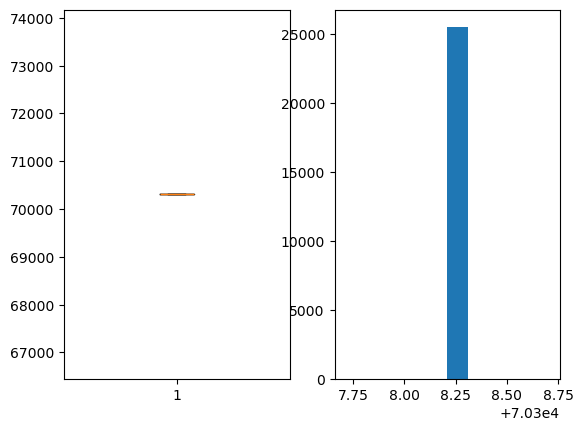

In [56]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])